# ЦПТ своими руками

In [35]:
# импорт библиотек

from scipy.stats import semicircular
from scipy.stats import norm
from matplotlib import pyplot as plt
import numpy as np

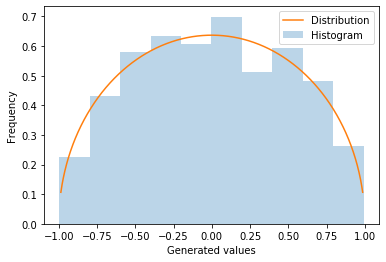

In [36]:
# генерируем выборку объема 1000 и строим гистограмму

X = semicircular.rvs(size=1000, scale=1)
x = np.linspace(semicircular.ppf(0.001), semicircular.ppf(0.999), 1000)

plt.hist(X, density=True, histtype='stepfilled', alpha = 0.3, label = 'Histogram')
plt.plot(x, semicircular.pdf(x), label = 'Distribution')

plt.xlabel('Generated values')
plt.ylabel('Frequency')

plt.legend()
plt.show()

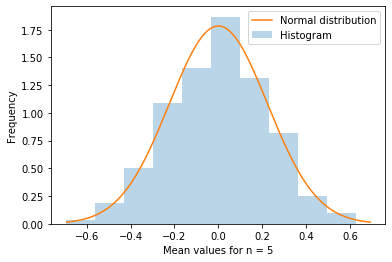

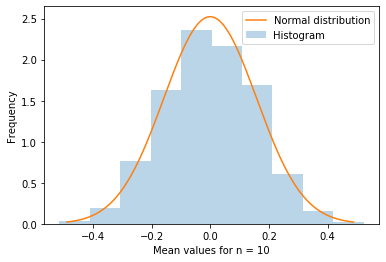

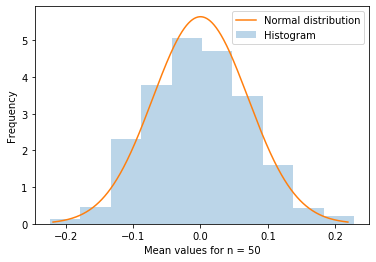

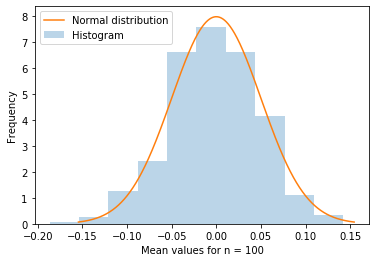

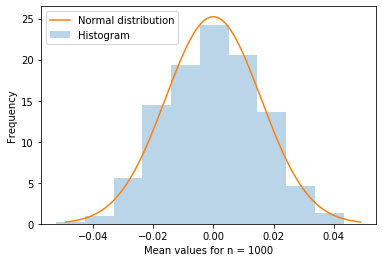

In [57]:
# генерируем по 1000 выборок объема 5, 10, 50, 100 и 1000,  проделываем те же самые операции для их выборочных средних
# по свойствам распределения Вигнера, матожидание этого распределения = 0, а дисперсия = R^2/4, где у нас R = 1.
# Значит, значения средних приближаются нормальным распределением с параметрами (0, 1/(4*n)), 
# а в функцию мы передадим корень из второго параметра.

for n in [5, 10, 50, 100, 1000]:
    normal_distrib = norm(scale=(n*4) ** (-0.5))
    X = semicircular.rvs(size=[1000, n], scale=1)
    X = np.mean(X, axis = 1)
    x = np.linspace(normal_distrib.ppf(0.001), normal_distrib.ppf(0.999), 1000)

    plt.hist(X, density=True, histtype='stepfilled', alpha = 0.3, label = 'Histogram')
    plt.plot(x, normal_distrib.pdf(x), label = 'Normal distribution')

    plt.xlabel(f'Mean values for n = {n}')
    plt.ylabel(f'Frequency')

    plt.legend()
    plt.show()

Из построенных выше гистограмм и нормальных распределений видно, что с ростом числа элементов в выборке уменьшается разброс выборочного среднего, а точность аппроксимации нормальным распределением увеличивается.